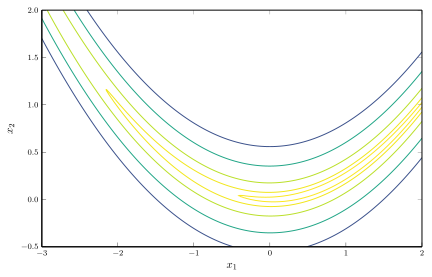

In [11]:
###################################################################################
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx() #pyplot()

# Rosenbrock function
fp(x1,x2) = (1 - x1)^2 + 100*(4x2 - x1^2)^2

x1 = -3:0.01:2
x2 = -0.5:0.01:2

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels=[2,10,50,200,500], 
    c = cgrad(:viridis, [0.01, 0.02, 0.03], rev = true), 
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-3,2),
    ylims = (-0.5,2),
    legend = false,
    grid = false,
    contour_labels = false,
    bins = 150,
    label = false)

In [12]:
# Nesterov - Momentum Method
mutable struct NesterovMomentum
    α # learning rate
    β # momentum decay
    v # momentum
end

function step!(M::NesterovMomentum, f, ∇f, x)
    α, β, v = M.α, M.β, M.v
    v[:] = β*v - α*∇f(x + β*v)
    return x + v
end

step! (generic function with 3 methods)

In [13]:
# Mathematical expression
f = x -> (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
∇f = x -> [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]

# Initial point
x0 = [-2,1.5]

2-element Array{Float64,1}:
 -2.0
  1.5

In [14]:
M = NesterovMomentum(0.0002, 0.92, zeros(length(x0)))

NesterovMomentum(0.0002, 0.92, [0.0, 0.0])

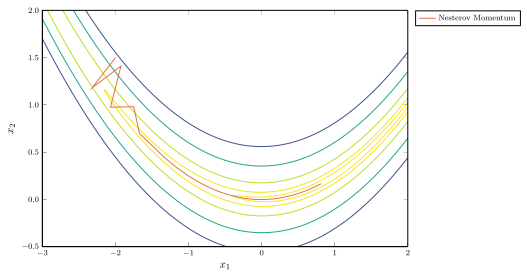

In [15]:
points = []
push!(points, (x0))
N = 40

for i=1:40
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "Nesterov Momentum", legend = true)

In [16]:
# Gradient descent
struct GradientDescent
    α
    end

function step!(M::GradientDescent, f, ∇f, x)
    α, g = M.α, ∇f(x)
    return x - α*g
end

step! (generic function with 3 methods)

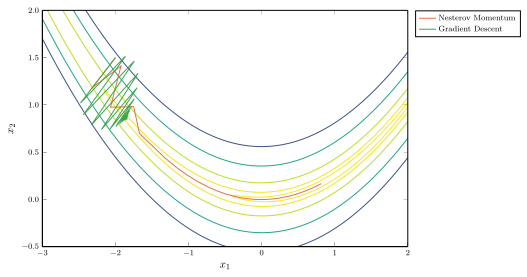

In [17]:
x0 = [-2,1.5]
points = []
push!(points, (x0))

M = GradientDescent(0.0003)

N = 40

for i=1:40
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "Gradient Descent", legend = true)

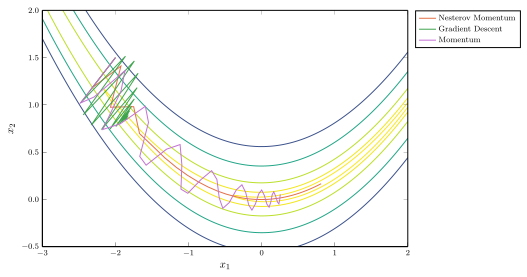

In [18]:
# Momentum Method
mutable struct Momentum
    α # learning rate
    β # momentum decay
    v # momentum
end

function step!(M::Momentum, f, ∇f, x)
    α, β, v, g = M.α, M.β, M.v, ∇f(x)
    v[:] = β*v - α*g
    return x + v
end

x0 = [-2,1.5]
points = []
push!(points, (x0))

M = Momentum(0.0003, 0.9, zeros(length(x0)))
N = 40

for i=1:40
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "Momentum", legend = true)

In [19]:
savefig(pl1, "5.4 Nesterov-Momentum.svg")